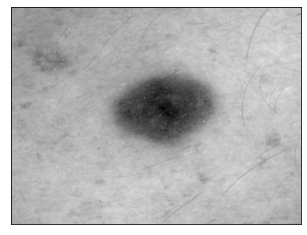

In [14]:



import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from skimage.io import imread
from skimage.color import rgb2gray

# Load the image from your database
image = imread('hey.jpg')


image = rgb2gray(image)
contours = measure.find_contours(image, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()


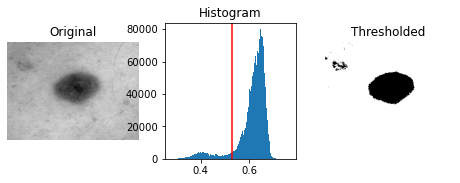

In [21]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu

image = imread('premier.jpg')
image = rgb2gray(image)
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

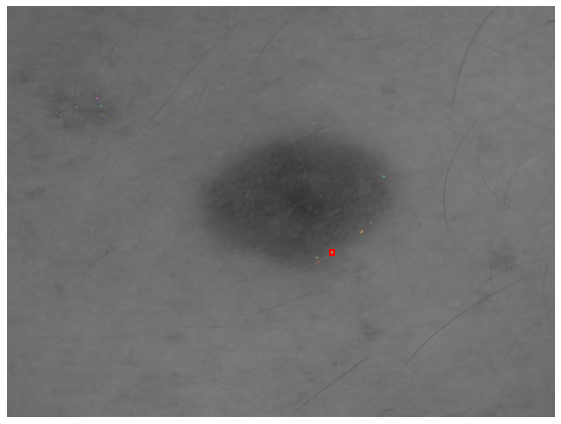

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb



# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=image, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [ ]:
matplotlib.rcParams['font.size'] = 9


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display Slice of Image
    ax_img.imshow(image[0], cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')

    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = img_as_ubyte(data.brain())

# Global equalization
img_rescale = exposure.equalize_hist(img)

# Local equalization
neighborhood = ball(3)
img_eq = rank.equalize(img, footprint=neighborhood)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(8, 5))
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Global equalize')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Local equalize')
ax_cdf.set_ylabel('Fraction of total intensity')


# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

In [31]:
import torch
import piq

#from DISTS_pytorch import DISTS


D =piq.DISTS()
# calculate DISTS between X, Y (a batch of RGB images, data range: 0~1)
# X: (N,C,H,W) 
# Y: (N,C,H,W) 
X = imread('hey.jpg')
Y = imread('hey.jpg')
dists_value = D(X, Y)
# set 'require_grad=True, batch_average=True' to get a scalar value as loss.
dists_loss = D(X, Y, require_grad=True, batch_average=True) 
dists_loss.backward()

ValueError: not enough values to unpack (expected 4, got 3)

processing...
compressing...
arranging...


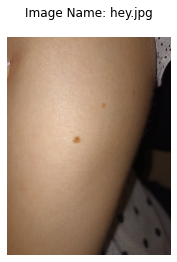

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd
from PIL import Image
from ipywidgets import interact, interactive, interact_manual
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline
# replace images with the image you want to compress

def show_images(img_name):
    'It will show image in widgets'
    print("Loading...")
    plt.title("Image Name: "+img_name+"\n")
    plt.imshow(img_name)
    plt.axis('off')
    plt.show()

def compress_image(img_name, k):
    print("processing...")
    global text
    global compressed_image
    img = imread(img_name)
    
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]
    
    print("compressing...")
    ur,sr,vr = svd(r, full_matrices=False)
    ug,sg,vg = svd(g, full_matrices=False)
    ub,sb,vb = svd(b, full_matrices=False)

    rr = np.dot(ur[:,:k],np.dot(np.diag(sr[:k]), vr[:k,:]))
    rg = np.dot(ug[:,:k],np.dot(np.diag(sg[:k]), vg[:k,:]))
    rb = np.dot(ub[:,:k],np.dot(np.diag(sb[:k]), vb[:k,:]))
    
    print("arranging...")
    rimg = np.zeros(img.shape)
    rimg[:,:,0] = rr
    rimg[:,:,1] = rg
    rimg[:,:,2] = rb
    
    for ind1, row in enumerate(rimg):
        for ind2, col in enumerate(row):
            for ind3, value in enumerate(col):
                if value < 0:
                    rimg[ind1,ind2,ind3] = abs(value)
                if value > 255:
                    rimg[ind1,ind2,ind3] = 255

    compressed_image = rimg.astype(np.uint8)
    
    plt.title("Image Name: "+img_name+"\n")
    plt.imshow(compressed_image)
    plt.axis('off')
    plt.show()
    
    
    
    #compressed_image = Image.fromarray(compressed_image)
    
    
compress_image("hey.jpg", 100)